LeetCode | Top 100 | 34. Find First and Last Position of Element in Sorted Array

# Question
[34. Find First and Last Position of Element in Sorted Array](https://leetcode.com/problems/find-first-and-last-position-of-element-in-sorted-array/)

Given an array of integers `nums` sorted in non-decreasing order, find the starting and ending position of a given `target` value. [^LeetCode_Hot100_34]

If `target` is not found in the array, return `[-1, -1]`.

You must write an algorithm with `O(log n)` runtime complexity.

Example 1:
```
Input: nums = [5,7,7,8,8,10], target = 8
Output: [3,4]
```
Example 2:
```
Input: nums = [5,7,7,8,8,10], target = 6
Output: [-1,-1]
```
Example 3:
```
Input: nums = [], target = 0
Output: [-1,-1]
```

Constraints:
- `0 <= nums.length <= 10^5`
- `-10^9 <= nums[i] <= 10^9`
- `nums` is a non-decreasing array.
- `-10^9 <= target <= 10^9`

# Knowledge Points

## Binary Search

### Concept

**reference:**<br>
[How to Do a Binary Search in Python](https://realpython.com/binary-search-python/#implementing-binary-search-in-python)

The word `binary` is generally associated with the number `2`. In this context, it refers to dividing a collection of elements into two halves and throwing away one of them at each step of the algorithm. This can dramatically reduce the number of comparisons required to find an element. But there’s a catch—elements in the collection must be sorted first.

The idea behind it resembles the steps for finding a page in a book. At first, you typically open the book to a completely random page or at least one that’s close to where you think your desired page might be.

Occasionally, you’ll be fortunate enough to find that page on the first try. However, if the page number is too low, then you know the page must be to the right. If you overshoot on the next try, and the current page number is higher than the page you’re looking for, then you know for sure that it must be somewhere in between.

You repeat the process, but rather than choosing a page at random, you check the page located right in the middle of that new range. This minimizes the number of tries. A similar approach can be used in the number guessing game. If you haven’t heard of that game, then you can look it up on the Internet to get a plethora of examples implemented in `Python`.

The page numbers that restrict the range of pages to search through are known as the lower bound and the upper bound. In binary search, you commonly start with the first page as the lower bound and the last page as the upper bound. You must update both bounds as you go. For example, if the page you turn to is lower than the one you’re looking for, then that’s your new lower bound.

Let’s say you were looking for a `strawberry` in a collection of fruits sorted in ascending order by size:

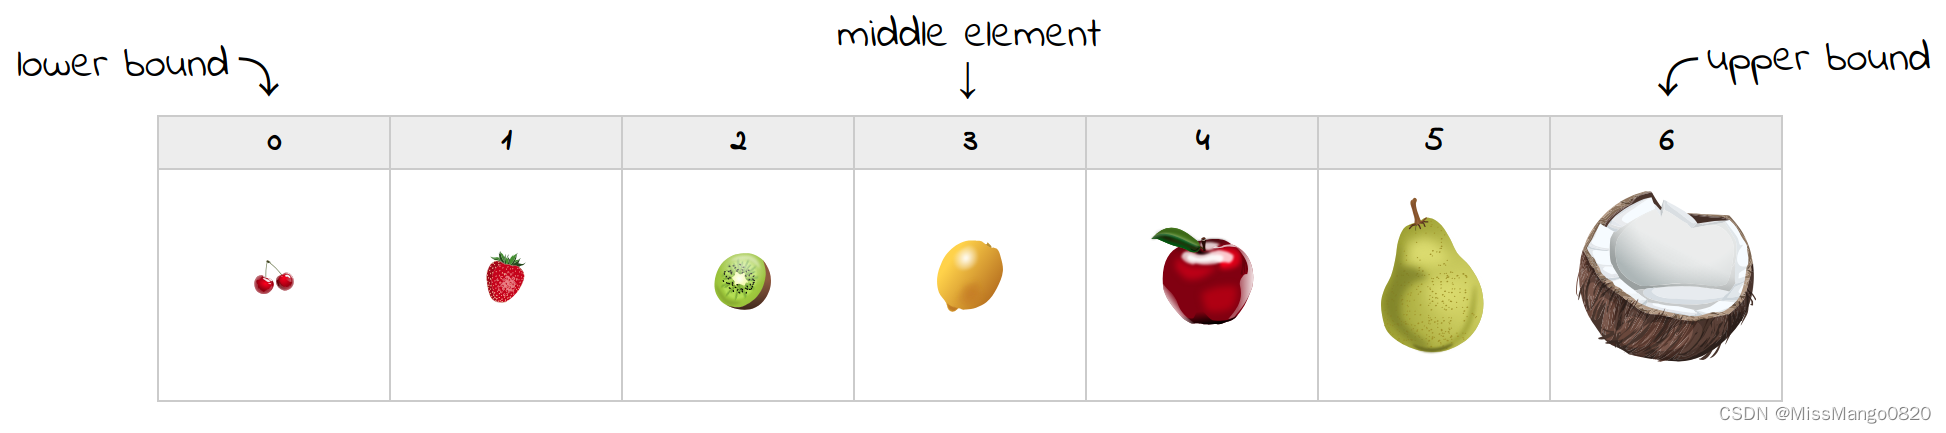


On the first attempt, the element in the middle happens to be a `lemon`. Since it’s bigger than a `strawberry`, you can discard all elements to the right, including the `lemon`. You’ll move the upper bound to a new position and update the middle index:

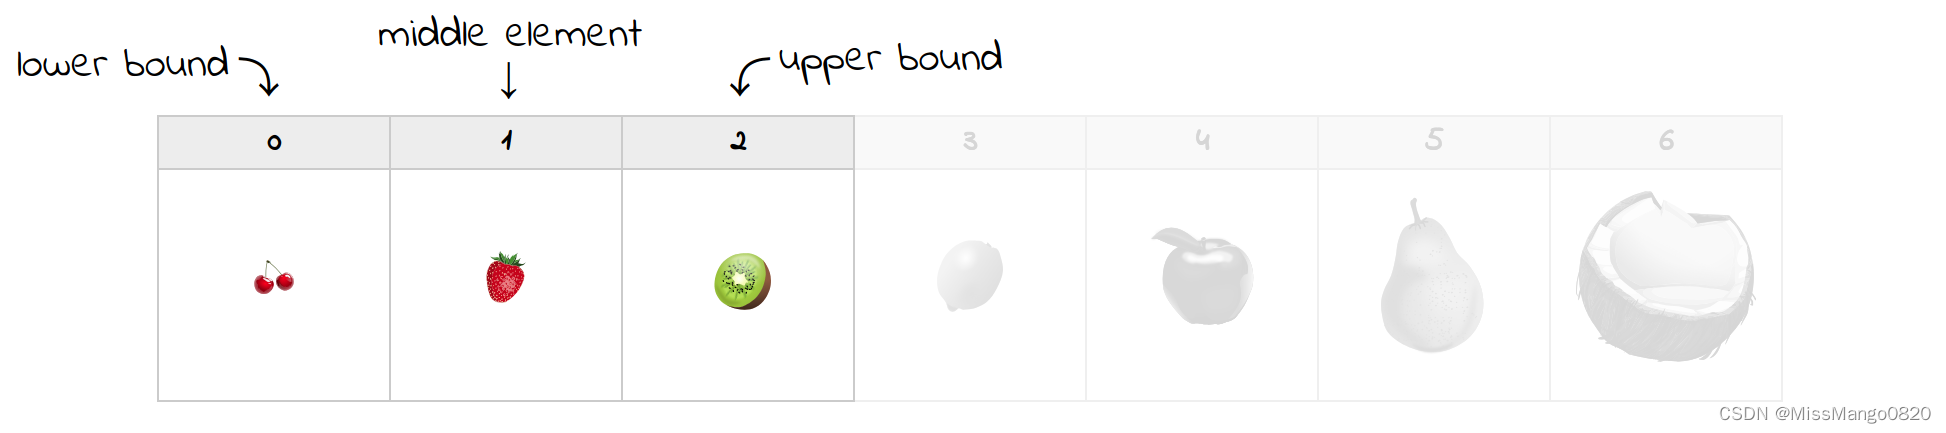

Now, you’re left with only half of the fruits you began with. The current middle element is indeed the `strawberry` you were looking for, which concludes the search. If it wasn’t, then you’d just update the bounds accordingly and continue until they pass each other. For example, looking for a missing `plum`, which would go between the `strawberry` and a `kiwi`, will end with the following result:

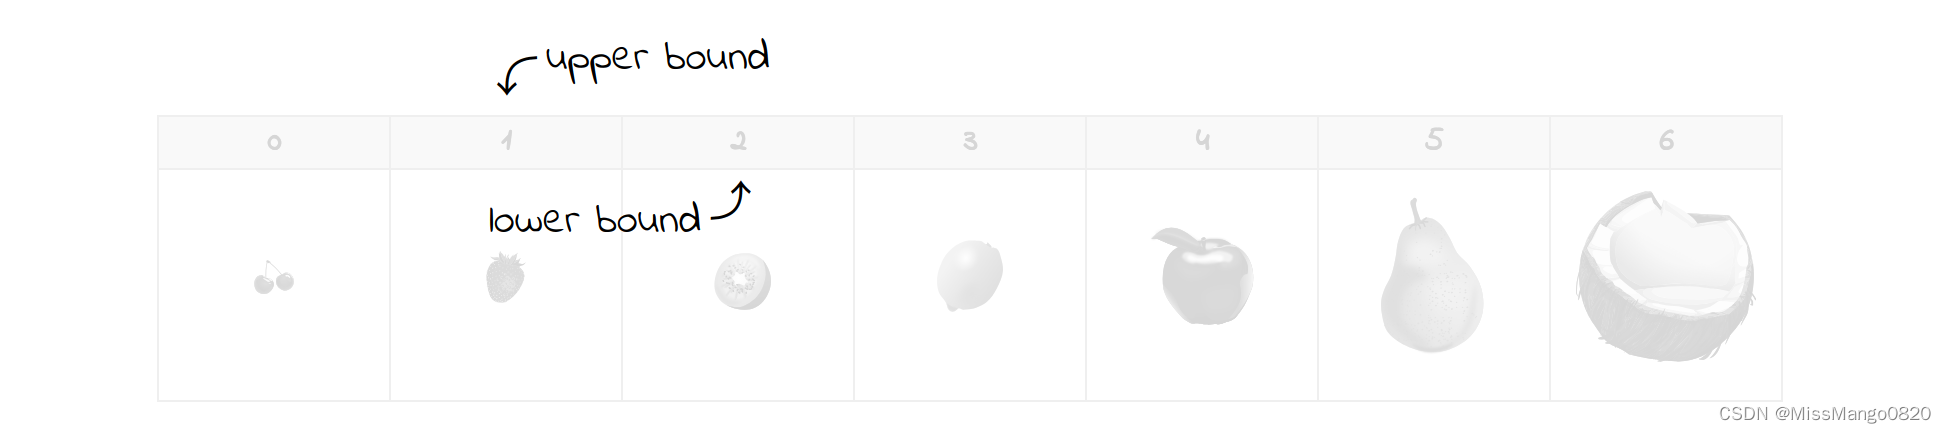

Notice there weren’t that many comparisons that had to be made in order to find the desired element. That’s the magic of `binary search`. Even if you’re dealing with a million elements, you’d only require at most a handful of checks. This number won’t exceed the logarithm base two of the total number of elements due to halving. In other words, the number of remaining elements is reduced by half at each step.


### Application

- search
- set membership testing
- find largest or smallest value
- find nearest neighbor of the target value
- perform rage queries
- ...

### Pros & Cons

If `speed` is a top priority, then `binary search` is not always the best choice. There are even faster algorithms that can take advantage of `hash-based data structures`. 

However, those algorithms require a lot of additional `memory`, whereas `binary search` offers a good `space-time tradeoff`.    

### Implementation

https://blog.csdn.net/u014745194/article/details/72802774


https://realpython.com/binary-search-python/#implementing-binary-search-in-python

#### Recursively

In [268]:
def contains(elements, value):
    left, right = 0, len(elements) - 1
    if right < left:
        print(f"{elements} empty")
        return -1
    else:
        if elements[left] > value or elements[right] < value:
            print(f"'{value}' out of '{elements}'")
            return -1
        
    print(f"elements boundaries: [{left},{right}]")

    def recursive(left, right):
        middle = (left + right) // 2
        if left <= right:
            if elements[middle] < value:
                print(f"elements[{middle}] {elements[middle]} < {value}, correct left index to {middle+1}")
                return recursive(middle + 1, right)
            else:
                print(f"elements[{middle}] {elements[middle]} >= {value}, correct right index to {middle-1}")
                return recursive(left, middle - 1)
        else:
            if elements[left] == value:
                return left
            else:
                print(f"'{value}' not in '{elements}'")
                return -1
            
    return recursive(0, len(elements) - 1)

In [269]:
nums = []
result = contains(nums, 25)
print(result)

[] empty
-1


In [270]:
nums = [5,7,7,8,8,10]
result = contains(nums, 25)
print(result)

'25' out of '[5, 7, 7, 8, 8, 10]'
-1


In [271]:
nums = [5,7,7,8,8,10]
result = contains(nums, 3)
print(result)

'3' out of '[5, 7, 7, 8, 8, 10]'
-1


In [272]:
nums = [5,7,7,8,8,10]
result = contains(nums, 6)
print(f"{result}")

elements boundaries: [0,5]
elements[2] 7 >= 6, correct right index to 1
elements[0] 5 < 6, correct left index to 1
elements[1] 7 >= 6, correct right index to 0
'6' not in '[5, 7, 7, 8, 8, 10]'
-1


In [273]:
nums = [5,7,7,8,8,10]
result = contains(nums, 8)
print(f"{result}")

elements boundaries: [0,5]
elements[2] 7 < 8, correct left index to 3
elements[4] 8 >= 8, correct right index to 3
elements[3] 8 >= 8, correct right index to 2
3


In [274]:
nums = [5,7,7,8,8,10]
result = contains(nums, 5)
print(f"{result}")

elements boundaries: [0,5]
elements[2] 7 >= 5, correct right index to 1
elements[0] 5 >= 5, correct right index to -1
0


In [275]:
nums = [5,7,7,8,8,10]
result = contains(nums, 7)
print(f"{result}")

elements boundaries: [0,5]
elements[2] 7 >= 7, correct right index to 1
elements[0] 5 < 7, correct left index to 1
elements[1] 7 >= 7, correct right index to 0
1


#### Iteratively

In [276]:
def contains(elements, value):
    left, right = 0, len(elements) - 1
    if right < left:
        print(f"{elements} empty")
        return -1
    else:
        if elements[left] > value or elements[right] < value:
            print(f"'{value}' out of '{elements}'")
            return -1
        while left <= right:
            middle = (left + right) // 2
            if elements[middle] >= value:
                print(f"elements[{middle}] {elements[middle]} >= {value}, correct right index to {middle-1}")
                right = middle - 1
            else:
                print(f"elements[{middle}] {elements[middle]} < {value}, correct left index to {middle + 1}")
                left = middle + 1
        if elements[left] == value:
            return left
        else:
            print(f"'{value}' not in '{elements}'")
            return -1

In [277]:
nums = []
result = contains(nums, 25)
print(result)

[] empty
-1


In [278]:
nums = [5,7,7,8,8,10]
result = contains(nums, 25)
print(result)

'25' out of '[5, 7, 7, 8, 8, 10]'
-1


In [279]:
nums = [5,7,7,8,8,10]
result = contains(nums, 3)
print(result)

'3' out of '[5, 7, 7, 8, 8, 10]'
-1


In [280]:
nums = [5,7,7,8,8,10]
result = contains(nums, 6)
print(f"{result}")

elements[2] 7 >= 6, correct right index to 1
elements[0] 5 < 6, correct left index to 1
elements[1] 7 >= 6, correct right index to 0
'6' not in '[5, 7, 7, 8, 8, 10]'
-1


In [281]:
nums = [5,7,7,8,8,10]
result = contains(nums, 8)
print(f"{result}")

elements[2] 7 < 8, correct left index to 3
elements[4] 8 >= 8, correct right index to 3
elements[3] 8 >= 8, correct right index to 2
3


In [282]:
nums = [5,7,7,8,8,10]
result = contains(nums, 5)
print(f"{result}")

elements[2] 7 >= 5, correct right index to 1
elements[0] 5 >= 5, correct right index to -1
0


In [283]:
nums = [5,7,7,8,8,10]
result = contains(nums, 7)
print(f"{result}")

elements[2] 7 >= 7, correct right index to 1
elements[0] 5 < 7, correct left index to 1
elements[1] 7 >= 7, correct right index to 0
1


# Solutions

## Binary Search

### Example

**Example 1:**

1. search left index<br>
define 2 pointers `left` and `right`<br>
initialize `left` with `0` and right with `len(nums)-1`<br>
`left` points to the first item<br>
`right` points to the last item<br>
  + while `left` smaller or equal to `right`<br>
`mid` is the median between `left` and `right`<br>
    + 1.1 if `target` smaller than or equal with `nums[mid]`<br>
        move `right` to the left of `mid` with `mid-1`<br>
    + 1.2 if target larger than `nums[mid]`<br>
        move `left` to the right of `mid` with `mid+1`
    
&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;if the `left`th num is equal with `target`, return `left` and end;
else, target is not in nums, return `-1` and end;

2. search right index<br>
define 2 pointers `left` and `right`<br>
initialize `left` with `0` and right with `len(nums)-1`<br>
`left` points to the first item<br>
`right` points to the last item<br>
  + while `left` smaller or equal to `right`<br>
`mid` is the median between `left` and `right`<br>
    + 1.1 if `target` smaller than `nums[mid]`<br>
      move `right` to the left of `mid` with `mid-1`<br>
    + 1.3 if target larger than or equal with `nums[mid]`<br>
      move `left` to the right of `mid` with `mid+1`
    
&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;if the `right`th num is equal with `target`, return `right` and end; 
else, the target is not in `nums`, return `-1` and end;

3. if `right` smaller than `left`, or, the `left`th num larger than `target`, or, the `right`th num smaller than `target`, return [-1, -1];<br>
else, return the left index from **1.** and right index from **2.**

In [24]:
class Solution(object):
    def searchRange(self, nums, target):
        def leftindex(left, right):                                      # 1.
            while left <= right:
                mid = left + (right-left)//2
                if nums[mid] >= target:                               # 1.1
                    right = mid - 1
                else:                                                    # 1.2 
                    left = mid + 1
            if nums[left] == target:                                     
                return left
            else:
                return -1

        def rightindex(left, right):                                     # 2.
            while left <= right:
                mid = (left + right) // 2
                if nums[mid] > target:                                # 2.1
                    right = mid - 1
                else:                                                    # 2.2
                    left = mid + 1 
            if nums[right] == target:
                return right
            else:
                return -1

        left, right = 0, len(nums) - 1
        if right < left or nums[left] > target or nums[right] < target:  # 3.
            return [-1, -1]
        return [leftindex(left, right), rightindex(left, right)]

In [25]:
nums = [5,7,7,8,8,10]
ex = Solution()
output = ex.searchRange(nums=nums, target=3)
print(output)

[-1, -1]


In [26]:
nums = [3, 3, 3]
ex = Solution()
output = ex.searchRange(nums=nums, target=3)
print(output)

[0, 2]


In [27]:
nums = [2,2]
ex = Solution()
output = ex.searchRange(nums=nums, target=2)
print(output)

[0, 1]


**Example 2:**

1. search left index<br>
define 2 pointers `left` and `right`<br>
initialize `left` with `0` and right with `len(nums)-1`<br>
`left` points to the first item<br>
`right` points to the last item<br>
  + while `left` smaller or equal to `right`<br>
`mid` is the median between `left` and `right`<br>
    + 1.1 if `target` is equal with `nums[mid]`<br>
      + if the first item is target, or, `mid==0`<br>
        return `mid`<br>
      + if the num on the left of `mid` is smaller than `target`, or, `nums[mid-1]<target`<br>
        return `mid`<br>
    + 1.2 if `target` smaller than `nums[mid]`<br>
        move `right` to the left of `mid` with `mid-1`<br>
    + 1.3 if target larger than `nums[mid]`<br>
        move `left` to the right of `mid` with `mid+1`
    
&emsp;&emsp;&emsp;&emsp;&ensp;&ensp;&nbsp;the target is not in `nums`, return `-1` and end;

2. search right index<br>
define 2 pointers `left` and `right`<br>
initialize `left` with `0` and right with `len(nums)-1`<br>
`left` points to the first item<br>
`right` points to the last item<br>
  + while `left` smaller or equal to `right`<br>
`mid` is the median between `left` and `right`<br>
    + 1.1 if `target` is equal with `nums[mid]`<br>
      + if the last item is target, or, `mid==len(nums)-1`<br>
        return `mid`<br>
      + if the num on the right of `mid` is larger than `target`, or, `nums[mid+1]>target`<br>
        return `mid`<br>
    + 1.2 if `target` smaller than `nums[mid]`<br>
      move `right` to the left of `mid` with `mid-1`<br>
    + 1.3 if target larger than `nums[mid]`<br>
      move `left` to the right of `mid` with `mid+1`
    
&emsp;&emsp;&emsp;&emsp;&ensp;&ensp;&nbsp;the target is not in `nums`, return `-1` and end;

3. return the left index from **1.** and right index from **2.**

In [28]:
class Solution:
    def searchRange(self, nums, target: int):
        def searchLeft():                                          # 1.
            left, right = 0, len(nums) - 1                           
            while left <= right:             
                mid = left + (right - left)//2
                if nums[mid] == target:                            # 1.1
                    if mid ==0 or nums[mid - 1] < target: 
                        return mid                        
                    else:                                 
                        right = mid - 1                   
                elif nums[mid] > target:                           # 1.2 
                    right = mid - 1
                else:
                    left = mid + 1                                 # 1.3
            return -1

        def searchRight():                                         # 2.
            left, right = 0, len(nums) - 1
            while left <= right:
                mid = left + (right - left)//2
                if nums[mid] == target:                            # 2.1
                    if mid == len(nums)-1 or nums[mid+1] > target:
                        return mid
                    else:
                        left = mid + 1
                elif nums[mid] > target:                           # 2.2 
                    right = mid - 1
                else:
                    left = mid + 1                                 # 2.3
            return -1

        return [searchLeft(), searchRight()]                       # 3.

In [29]:
nums = [2, 2]
target = 2
sol = Solution()
index = sol.searchRange(nums, target)
print(index)

[0, 1]


In [30]:
nums = [3,3,3]
target = 3
sol = Solution()
index = sol.searchRange(nums, target)
print(index)

[0, 2]


In [31]:
nums = [5, 7, 7, 8, 8, 10]
target = 8
sol = Solution()
index = sol.searchRange(nums, target)
print(index)

[3, 4]
